In [1]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as pl
import os

# Finding the Best Baller in Hyde Park Using Statistics
The basic idea of this course is to teach students basic statistics and computer programming under the guise of basketball and keeping track of statistics.

Students will have class two days a week. The first day will be spent actually playing basketball. At least one student (or teacher) will spend time tracking statistics for each player, including rebounds, blocks, FGA, FGM, 3PA, 3PM, steals, assists (a little harder to track). Kids love to track stats

The students will be REQUIRED to participate in the class. Keeping them in line will happen with a board for "minus playing time". Talking out of class or using the laptops for things other than programming will result in a forced benching for a certain time in the gym.

First lecture will be looking at statistics for certain famous basketball players over time... Of course I'll have to talk trash about Larry Bird and Paul Pierce being better than MJ. But we'll look at the basic statistics as well as the more advaned analytics.

Every lecture from then on will involve manipulating the students' own statistics. We will need access to the wifi, but hopefully we can disable google chrome.

Stat keeping can maybe be done in excel(?) or some kind of GUI. Ideally the students can then access their stats via SSH on linux powered machines. This way we can teach them basic command line skills, which can help set a framework for more advanced programming down the line.

# The final project will be a powerpoint presentation - an argument - using plots created by the students to determine who is the GOAT in the NBA... or in the HPSC (Hyde Park Stats Course).

In [ ]:
# Will first need to run through the ABSOLUTE Basics...


# Alright here are the breakdowns of what stats to look at (via basketball-reference.com

1) FGM, FGA, FG%, RPG, BPG, 3PM, 3PA, 3P%, APG, SPG, TOV, PTS (simple statistics, can mention standard deviations as measures of "consistency")

2) EFG%, TS% (i.e. the concept of a "weighted average") 

3) Per36, Per 100 Possesions (i.e. extrapolating)... 100 possesions might not work

4) PER (Player efficiency rating) (normalization)

5) True nerd stuff (if we have time) looking at WinShares (WS), Box Plus/Minus (BPM), Value Over Replacement Player (VORP)
(https://www.basketball-reference.com/about/ws.html)

# So, let's get in to some actual programming (the curriculum)

# Lesson 1

In [3]:
# First, start with the super basics of python (just so they have some general idea of what to do)

# !!!!!! The above (and this) line is the first lesson! Write comments by putting a hashtag in front of it 

#balling

# Next step, let's define a VARIABLE (some letter or word that holds information)
x=3
# now, the letter 'x' is associated with the number 3

#show that this is true using the 'print' command
print(x)

#... But just typing and hitting enter doesn't do anything. In Jupyter notebook have to hit "cntrl+enter"

3


In [4]:
# Alright, let's ramp things up a little bit...

# We can do basic math with programming (and we're going to look at it using 'print')

print(x+x) # add!  should print '6'

6


In [5]:
print(x-x) #subtract should print '0'

0


In [6]:
print(x*x) # multiply! should be '9'

9


In [7]:
print(x/x) # divide! should be '1'

1.0


In [8]:
print(x**2) # take powers (here, a square) of a number, should be '9' again

9


In [9]:
# should note, all of this works if you replace the 'x', with a number... python can be a fancy calculator
print(23+33) # should be '56'

56


# So now let's learn some math...
What is an average? Think of it in terms of basketball...

Let's say Lebron James scores 20 points against the Celtics and 30 points against the Bulls in back-to-back games
What's his points per game? This is the same as asking what are the AVERAGE number of points he scores each game

In [3]:
# Well we know it should be 25, but how do we calculate that?

# Simply (20+30)/2
points=20+30
games=2
print(points/games)

25.0


In [5]:
# What happens if we have way more games? 
# The average can ALWAYS simply be [Sum of all the points in N games]/N

# Try again for Giannis Antetokounmpo's point totals from December 2018
points=33+15+22+19+12+44+32+25+30+9+30+31+31
games=13 # N=13 here
print(points/games)

25.615384615384617


# This is how ALL averages are calculated. For basketball and for life. Rebounds/game, Assists/game, Steals/game, Blocks/Game, etc.

In [3]:
# Now, go to basketball-reference.com and search for your favorite player. 
# Use the space below to enter in the point totals by that player for the last ten games.
# Use the example in the cell above to help you calculate their points per game. Ask for help if you need it!

#EXAMPLE STUDENT CODE (points made up):
points=10+15+20+13+5+25+30+18+16+12
games=10
print(points/games)

16.4


# Now, do the same thing for rebounds, assists, steals, and blocks

NOTE TO SELF: If no one picks Westbrook, I should do it as an example. Talk about how cool it is that he AVERAGES a triple double... 

ALSO note, this is a good point to bring up the fact that you don't always have to re-enter that "games" variable. Python is smart enough to carry that over.

Also, if the students are truly novices at typing and using computers, can potentially talk about the importance of copy and paste, undo, etc.

In [4]:
# Do that in this cell
#EXAMPLE STUDENT CODE (again, made up)

rebounds=10+2+8+4+5+8+12+7+5+5
print(rebounds/games)

assists=10+2+8+4+5+8+12+7+5+5
print(assists/games)

steals=10+2+8+4+5+8+5+7+5+5
print(steals/games)

blocks=3+2+4+4+5+4+3+5+5+2
print(blocks/games)

6.6
6.6
5.9
3.7


In [13]:
# Great, so now we have all of these averages! Does anyone know a good way to determine how CONSISTENT a player is?

# One great way is through the use of Standard Deviation. Standard Deviation is a typical metric used to talk
# about the spread or consistency of data. If you have a high standard deviation in say points, then you are
# something of a streaky scorer. If you have a low standard deviation, you're pretty consistent!

# Let's use the example of Giannis' points from the cell above. The variables should still be saved.

z=0
# Showing here a second way to save the points. Saving data this way can be a little more useful than
# adding it all together at once like we did in the above example.
points=[33,15,22,19,12,44,32,25,30,9,30,31,31]
games=len(points)
ppg=sum(points)/games

for i in points:
    z=(i-ppg)**2+z
stdev=np.sqrt(z/(games))
print(stdev)

9.450587784230969


## So the equation for the standard deviation (as you can see above) is a little more tricky.
 Let's look at that equation with help from Latex (don't worry if you don't understand the code in this next bit)
 
Also quick little note, probably only to me... I've forgetten a little bit of the formulation of statistics, but wikipedia for some reason uses N-1 rather than N in its equation. This is because they start off assuming you're dealing with a subset of a dataset... We instead are dealing with the sdev of a given complete set, so we use N

In [14]:
%%latex

$s=\sqrt{\dfrac{\sum_{n=1}^{N}(x_i-\bar{x})^2}{N}}$

<IPython.core.display.Latex object>

# So now I want you all to calculate standard devations to determine how consitstent your favorite players are?
## Are they more consistent with points or rebounds? Why do you think that is? What about blocks?

Oviously rebounds and blocks should be a bit more consistent, and that has a lot to do with dealing with smaller numbers in the case of rebounds and blocks. The fact that you can sometimes go off for 50 points, but very rarely if ever go off for 30 rebounds, means you are going to be a more "consistent" scorer...

Of course, this stat isn't perfect. Say James Harden goes for 30,35,37,28,50,55,28 points in a stretch of games, and Marcus Smart goes for 10,11,14,13,18,12,14. Marcus Smart is going to have a smaller standard deviation, but James Harden is still the more "consistent" scorer... So standard deviation is useful, but you have to be careful how you use it to craft your arguments!

In [25]:
# Do that in this cell (Again, take a little advantage of copy and paste!):

#EXAMPLE CODE
z1=0
z2=0
z3=0

points=[33,15,22,19,12,44,32,25,30,9,30,31,31]
games=len(points)
ppg=sum(points)/games

for i in points:
    z1=(i-ppg)**2+z1
stdev=np.sqrt(z1/(games))
print(ppg)
print(stdev)

rebounds=[10,8,12,7,13,6,8,9,10,9,11,5,10]
games=len(rebounds)
rpg=sum(rebounds)/games

for i in rebounds:
    z2=(i-rpg)**2+z2
stdev=np.sqrt(z2/(games))
print(rpg)
print(stdev)

blocks=[2,3,5,4,4,1,3,2,5,5,2,2,3]
games=len(blocks)
bpg=sum(blocks)/games

for i in blocks:
    z3=(i-bpg)**2+z3
stdev=np.sqrt(z3/(games))
print(bpg)
print(stdev)

25.615384615384617
9.450587784230969
9.076923076923077
2.2000537917038603
3.1538461538461537
1.2917581249035897


In [35]:
# Now that we're at the end of this lesson, I'll let you guys in on a secret...
# We can kind of cheat and calculate average and standard deviation the easy way, using numpy!

# numpy is imported as "np" and can help you calculate average and standard deviation!

# Use these commands!
print(np.average(points))
print(np.std(points))

25.615384615384617
9.450587784230969


In [ ]:
# Play around with these commands and compare to your earlier results? Do they match? If not, what's the issue???

# Great, that's the super basics... we can get in to more advanced things as we go on...

# Lesson 2

# So last class we had to play around with NBA player data by plugging it in to python by ourselves.
# Today we're going to learn how to load data in to python that's already been tabulated for us

Once again go to basketball-reference.com and search for your favorite player in the search bar.
Choose some season they've completed (let's exclude this season so we get a full 82 games in).
Click on that season and you should see the game log that has all of the player's box scores
Scroll down and find the text that says "Share & More". Click on this and it should give you the
option to "Get table as CSV (For Excel)". Click on this option and you should see the stats change

 Now that we have CSV-formatted stats for our favorite player, open up the terminal
(Ask for help if you can't find it) and type in "emacs player_name.txt"
 This should open up a new, blank window. Copy and paste the player data in to this empty window
 then hit "ctrl+x ctrl+c" to save and exit the editor.

Congrats! We now have the player data in a way that python can read it... Let's do this now

In [2]:
#Pandas (A funny name, I know) is a good way to read in datasets in python.
# Let's use pandas to read in the data files we just created.

# Place the name of the file you made in the single quotes below. When you hit 'ctrl + enter' you should see
# A nice table appear with all of the player's statistics.
pandas.read_csv('larry_bird.txt',header=None)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
1,1,1,1985-10-25,28-322,BOS,@,NJN,L (-4),1,36:00,...,2,10,12,10,8,1,6,3,21,25.4
2,2,2,1985-10-26,28-323,BOS,@,CLE,W (+5),1,34:00,...,2,6,8,4,1,0,4,2,20,12.2
3,3,3,1985-10-30,28-327,BOS,NaN,MIL,W (+11),1,27:00,...,0,8,8,5,1,3,5,5,22,21.2
4,4,4,1985-11-01,28-329,BOS,NaN,ATL,W (+4),1,41:00,...,0,7,7,5,0,1,9,3,25,11.7
5,5,5,1985-11-02,28-330,BOS,@,WSB,W (+15),1,36:00,...,0,8,8,8,2,0,1,1,10,13.6
6,6,6,1985-11-08,28-336,BOS,NaN,PHO,W (+24),1,34:00,...,3,3,6,10,2,0,3,2,24,22.1
7,7,7,1985-11-09,28-337,BOS,@,DET,W (+19),1,36:00,...,1,7,8,4,0,1,4,3,29,22.5
8,8,8,1985-11-13,28-341,BOS,NaN,IND,W (+4),1,42:00,...,3,12,15,7,1,0,3,4,18,12.7
9,9,9,1985-11-15,28-343,BOS,NaN,WSB,W (+4),1,35:00,...,1,10,11,5,2,0,3,1,22,18.8


In [5]:
# I should play around with this data a little bit to see what I want the students to get out of it.
#y=pandas.read_csv('larry_bird.txt, header=None) # Use this one to make sure you're picking out the right column
Bird_86=pandas.read_csv('larry_bird.txt',header=[1])
points=Bird_86.as_matrix()[:,27]
# Need to do this extra step to change the format of the numbers.
points_Bird_86=[int(a) for a in points]

/Users/boughter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Note about loading in Basketball reference data
Every time we want to load in some of the data from online, this is the method we will use. If you ever want to look at different players, different years, etc. just follow the last 5 cells exactly, changing the names of files where you need to.

# PROGRAMMING NOTE, the below section has an issue with Marcus Smart's data... Will need to build in a way to clean up "Inactive" from data

In [8]:
#smart17=pandas.read_csv('mSmart.txt',header=[1])
# technically not great to keep defining an re-defining "points" but it'll be ok for now
#points=smart17.as_matrix()[:,27]
# Need to do this extra step to change the format of the numbers.
#points_smart_17=[int(a) for a in points]

AI00=pandas.read_csv('AI00.txt',header=[1])
points=AI00.as_matrix()[:,27]
# Need to do this extra step to change the format of the numbers.
points_AI_00=[int(a) for a in points]

lebron17=pandas.read_csv('lebron17.txt',header=[1])
points=lebron17.as_matrix()[:,27]
points_lebron_17=[int(a) for a in points]

jordan85=pandas.read_csv('jordan85.txt',header=[1])
points=jordan85.as_matrix()[:,27]
points_jordan_85=[int(a) for a in points]

/Users/boughter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/boughter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/Users/boughter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Load in the Rest of the Data
So, let's try to do the same thing but for all the other stats: Total rebounds, assists, steals, blocks,turnovers, and anything else you personally want to look at.

HINT: The nice table gives you the column number of the stat you're interested in, so you can just replace the "27" in line 4 in the cell with the column # you want to look at (i.e. 25 for turnovers). Don't forget to change variable names! If you call your rebounds variable "points_LeBron_15" it will be confusing AND you'll overwrite what you did in the cell above!

In [ ]:
# Do that stuff in this cell!






# Great, now we know how to manipulate player data! for the next session, we'll use this to attempt to argue who the best players are...

# Lesson 3: Who is the Best Player in the NBA (Part I): A Look in to Averages and Standard Deviations

For the next two lessons, we can build upon what we did in the last class (literally! You can run some of the exact same code that you ran last time).

Let's try to use some data to determine who is the best player in the NBA right now. A lot of you might say LeBron, but what about James Harden? Kyrie? Can you make a strong case using these stats that we looked at last class?

In [11]:
# Recall averages and standard deviation from Lesson 1! (Even go back and take a look at it if tht helps)
# Lets look at the points per game of each player (we'll use the standard deviation later)

avg_bird=np.average(points_Bird_86)
avg_jordan=np.average(points_jordan_85)
avg_lebron=np.average(points_lebron_17)
avg_ai=np.average(points_AI_00)

std_bird=np.std(points_Bird_86)
std_jordan=np.std(points_jordan_85)
std_lebron=np.std(points_lebron_17)
std_ai=np.std(points_AI_00)

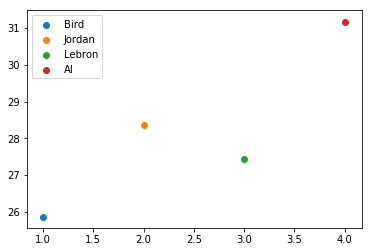

In [18]:
# To get at these questions, one of the helpful things we can do is plot the data! So how do we do that...

pl.scatter([1],[avg_bird])
pl.scatter([2],[avg_jordan])
pl.scatter([3],[avg_lebron])
pl.scatter([4],[avg_ai])
pl.legend(['Bird','Jordan', 'Lebron', 'AI'])


## So clearly, Allen Iverson is the greatest basketball player of all time, and Larry Bird isn't even close... Right?

# Of Course Not!!

What are some of the issues with making that claim with this data?
1. Obviously we're only looking at 1 season. Longevity matters for the GOAT debate.
2. We're only looking at ppg! There are a ton of other important things that happen on a basketball court
3. What about standard deviation? We talked about that last class... What does this plot look like taking that in to account?

<Container object of 3 artists>

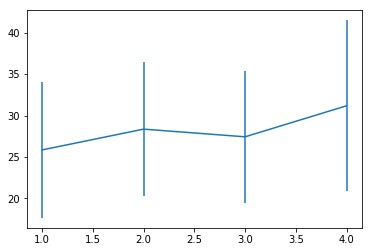

In [19]:
# Take a look at all of the averages WITH standard deviation
pl.errorbar([1,2,3,4],[avg_bird,avg_jordan,avg_lebron,avg_ai],yerr=[std_bird,std_jordan,std_lebron,std_ai])

# Without the players labelled, can you really see a difference between these 4 players? 
Not really... On the whole, we can say they were all really good scorers. Maybe AI fairly consistently scored a bit more, but not a *significant* amount more

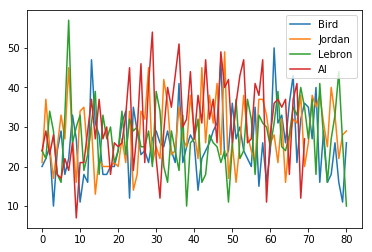

In [22]:
# So that's fairly interesting... How else can we look at the data? Well, what about looking at things game by game?

pl.plot(points_Bird_86)
pl.plot(points_jordan_85)
pl.plot(points_lebron_17)
pl.plot(points_AI_00)
pl.legend(['Bird','Jordan', 'Lebron', 'AI'])

# Well that didn't help... at all

In [ ]:
# So, let's try to look at all of the other stats... From last class, you should have saved the way you 
# load in player data... Now we want to take that column of numbers, and actually take those averages!



In [ ]:
# And once you have those averages, maybe try to plot all of the data on one graph!
# Here's a skeleton for how to do that:

## NOTE TO CHRIS, GIVE THEM THE FRAMEWORK TO SHOW POINTS, REBS, etc. all in the same figure (different axes)



# Lesson 4: Who is the Best Player in the NBA (Part II): Crafting Data-Based Arguments

Today we want to take what we've learned in the last three lesssons to start to craft a debate on who the best player in the league was LAST YEAR (2019). Russell Westbrook was MVP. Do you all agree with that? Why or why not?

# Note, I think I should go back and change lesson 3 to make the students look at people from the 2019 season explicitly... We can get in to GOAT territory at the end of the class

Let's try to keep these debates to looking at averages. But averages that you all calculate! You are also welcome to add in other factors like win/loss, playoff performance, etc. But it has to be quantitative!
We'll have a little time at the end of this class to discuss.

In [ ]:
# Do all of that here! Remember to steal stuff from the previous lessons! No shame if you can't remember
# all of the different commnads! Professional programmers copy and paste stuff all the time

# Lesson 5: Determining Class Leaders (It'll Probably Be Chris)

We're going to go back and forth in this class working with our own data and working with player data... We've finally played enough games where we now have a significant dataset with our own statistics.

But how do we load all of this data in to this jupyter notebook and manipulate it?

This is where we're going to use more bash scripting... It doens't matter for now what that means, just know that we're going to have to use the "terminal" on our computers some more

# Note for Chris: I'll probably have to wait until I have the laptops until I figure out how I want to do this. Maybe designate one BasketStats laptop for holding all of the data, and have the students use SCP the data over each time? Hmmm....

In [ ]:



# Spacer to let you know where I'm currently working (Above)




# Further down the course... How is PER calculated:
Apparently, you start with "unadjusted PER" (uPER)
(Should probably also take a look at PER wikipedia)
From basketball reference (https://www.basketball-reference.com/about/per.html):
uPER = (1 / MP) *
     [ 3P
     + (2/3) * AST
     + (2 - factor * (team_AST / team_FG)) * FG
     + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
     - VOP * TOV
     - VOP * DRB% * (FGA - FG)
     - VOP * 0.44 * (0.44 + (0.56 * DRB%)) * (FTA - FT)
     + VOP * (1 - DRB%) * (TRB - ORB)
     + VOP * DRB% * ORB
     + VOP * STL
     + VOP * DRB% * BLK
     - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) ]

Most of the terms in the formula above should be clear, but let me define the less obvious ones:

factor = (2 / 3) - (0.5 * (lg_AST / lg_FG)) / (2 * (lg_FG / lg_FT))
VOP    = lg_PTS / (lg_FGA - lg_ORB + lg_TOV + 0.44 * lg_FTA)
DRB%   = (lg_TRB - lg_ORB) / lg_TRB

VOP apparently stands for "value of possesion". The three defined terms above can all be arbitrarily selected for our league, since they are based on league averages (or we can choose a season we are most like). i.e can just decide VOP=1, DRB%=0.7, and then select reasonable averages for "lg" or "league averages"... Maybe this can actually be from our averages. We'll see how it goes.

We can also safely assume team_AST=lg_AST, etc. For stuff like FTA we can maybe use NBA averages

And... oh boy all this was only for unadjusted... we then need to adjust it.
Basketball reference adjusts for pace (we can assume pace_adjustment=1 i.e. we run at the same pace as our league)

So for our league, adjustedPER=unadjustedPER (since pace_adjustment=1)

and finally:
# PER=aPER*(15/lg_aPER), so normalized to 15, not 0
This is where we can manipulate things a little bit... either with an additive factor or changing that 15 to somemthing else... We would want to change it only because there is a reference on wikipedia that says 0-9.0 PER is "Someone who won't stick in the league"... I'll have to play with it before they do, because we don't want any kids to get stuck with that label.